In [1]:
import numpy as np
import pandas as pd
from tensorflow.python.keras.saving.saved_model_experimental import sequential

In [2]:
df = pd.read_csv("C:\\Users\\HP\\Desktop\\intern\\Breast Cancer detector\\data.csv")

In [3]:
df.head(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [28]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [32]:
df = df.drop(columns=['Unnamed: 32','id'],axis =1)

KeyError: "['Unnamed: 32', 'id'] not found in axis"

In [53]:
df.duplicated().sum()

np.int64(0)

In [44]:
df.shape

(569, 31)

In [50]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df['diagnosis'] = pd.get_dummies(df['diagnosis'] ,dtype=int,drop_first= True).values

In [12]:
df.head(2)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38           122.8     1001.0   
1          1        20.57         17.77           132.9     1326.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33            184.6   
1         0.1812  ...         24.99          23.41            158.8   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  

[2 rows x 31 columns]

In [15]:
x = df.iloc[:,1:]
y = df.iloc[:,:1]

In [20]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

In [22]:
x_scaled.shape

(569, 30)

In [23]:
x_scaled = pd.DataFrame(x_scaled, columns=x.columns, index=x.index)

In [26]:
x_scaled.head(2)

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                2.255747  ...      1.886690      -1.359293         2.303601   
1               -0.868652  ...      1.805927      -0.369203         1.535126   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    2.001237          1.307686           2.616665         2.109526   
1    1.890489         -0.375612          -0.430444        -0.146749   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0              2.296076        2.750622                 1.937015  
1              1.087084       -0.243890                 0.281190  

[2 rows x 30 columns]

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2)

In [29]:
import tensorflow
from tensorflow import keras

In [31]:
from tensorflow.keras.callbacks import EarlyStopping
early = EarlyStopping(patience=10, restore_best_weights=True)

In [33]:
from keras.models import Sequential

In [36]:
from tensorflow.keras.layers import Dense

In [48]:
model = Sequential()
model.add(Dense(100,activation='relu',input_dim=x_scaled.shape[1]))
model.add(Dense(60,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1,activation='linear'))

C:\Users\HP\Desktop\intern\Breast Cancer detector\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [51]:
history = model.fit(x_train,y_train,validation_split=0.2, callbacks=early
,epochs=50)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.7063 - loss: 0.6083 - val_accuracy: 0.9560 - val_loss: 0.1174
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9178 - loss: 0.3420 - val_accuracy: 0.9780 - val_loss: 0.0636
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9526 - loss: 0.2166 - val_accuracy: 0.9780 - val_loss: 0.0481
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9821 - loss: 0.0911 - val_accuracy: 0.9890 - val_loss: 0.0426
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9816 - loss: 0.2389 - val_accuracy: 0.9890 - val_loss: 0.0453
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9958 - loss: 0.0785 - val_accuracy: 0.9890 - val_loss: 0.0575
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9891 - loss: 0.0751 - val_accuracy: 0.9890 - val_loss: 0.0559
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9892 - loss: 0.1228 - val_accuracy: 0.9890 - val_los

In [42]:
y_log = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [52]:
y_pred = y_log.argmax(axis=1)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.6140350877192983

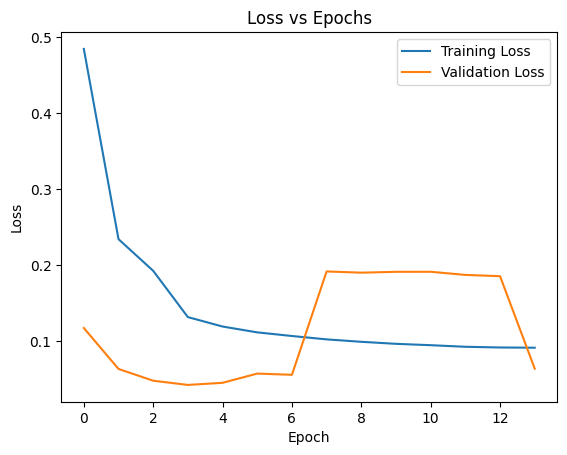

In [55]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')
plt.show()



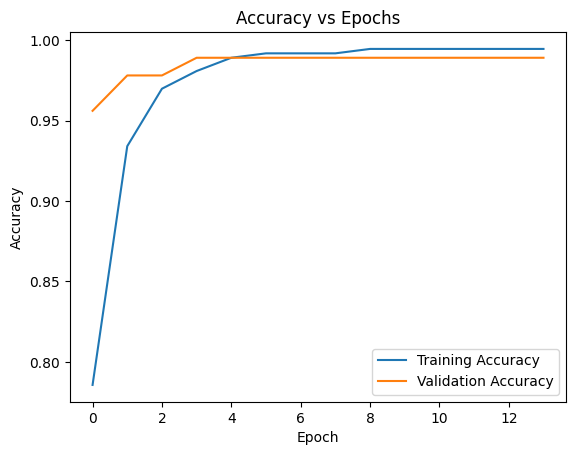

In [56]:
# You can also plot accuracy if available
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy vs Epochs')
    plt.show()